In [3]:
import numpy as np
import pandas as pd
import geopandas as gpd
import contextily as cx
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("../data/iwildcam_2022_crops_bioclip_inference_logits_v3.csv")
results_df = pd.read_csv("data/iwildcam_2022_results_v16_cameratrapai.csv")
df = df[df["location"].isin(results_df["location"].unique())]
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.longitude, df.latitude), crs="EPSG:4326"
)
gdf = gdf.to_crs(epsg=3857)

In [10]:
gdf["geometry"].nunique()

61

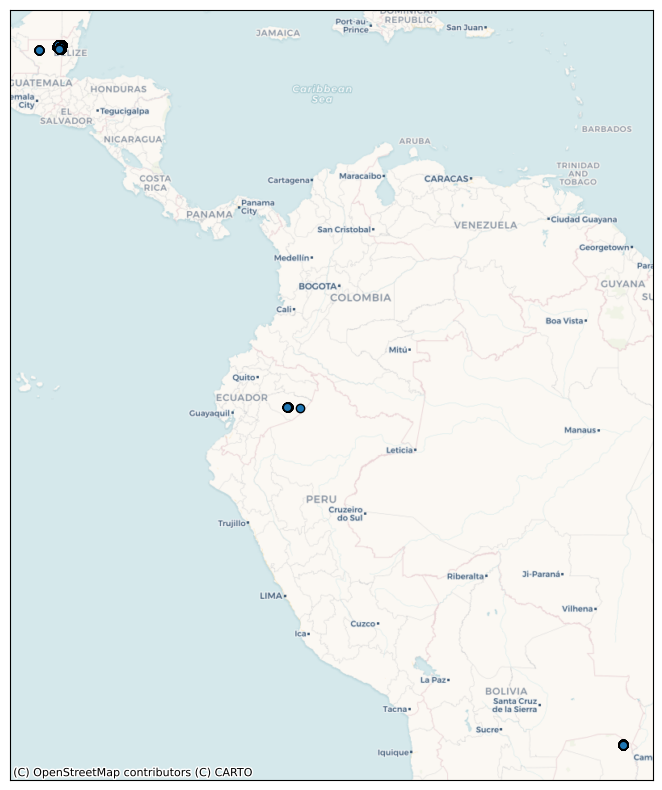

In [17]:
ax = gdf.plot(figsize=(10, 10), edgecolor="k")
cx.add_basemap(ax, source=cx.providers.CartoDB.Voyager)
ax.set_xticks([], [])
ax.set_yticks([], [])
plt.savefig("figures/map2.pdf", transparent=True, bbox_inches="tight", dpi=600)
plt.savefig("figures/map2.svg", transparent=True, bbox_inches="tight", dpi=600)